In [29]:
#SOMs

In [30]:
#They take a multi-dimensional dataset which might have lots of 
#columns and rows and they reduce the dimensionality of the status.
#YOU END UP WITH A 2D REPRESENTATION OF YOUR DATA

In [31]:
#How do self-organizing maps learn?

In [32]:
#Imp. to know

#SOMs retain topology of the input set.
#SOMs reveal correlations that are not easily identified.
#SOMs classify data without supervision.
#They dont require no target vector ->no backpropagation
#No lateral connections betw. output nodes.


In [33]:
#Training the SOM

#Step1 - We start with a dataset composed of n_features independent 
#        variables
#Step2 - We create grid composed of nodes, each one having a wt. 
#        vector of n_features elements.
#Step3 - Randomly initialize the values of the wt. vectors to small
#        numbers close to 0(but not 0).
#Step4 - Select one random observation point from the dataset.
#Step5 - Compute the euclidean distances from this point to the 
#        different neurons in the n/w.
#Step6 - Select the neuron that has the min. dist. to the point.
#        This neuron is called the winning node.
#Step7 - Update the wts. of the winning node to move it closer to 
#        the point.
#Step8 - Using a Gaussian neighbourhood function of mean the 
#        winning node, also update the wts. of the winning node
#        neighbours to move them closer to the point. The 
#        neighborhood radius is the sigma in the gaussian function.
#Step9 - Repeat steps 1 to 5 and update the wts. after each obs.
#        (reinforcement learning) or after a batch of obs.(batch
#        learning), until the network converges to a point where the
#        neighbourhood stops decreasing.

In [34]:
#Building a fraud detection system

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
%matplotlib inline

In [37]:
dataset = pd.read_csv('/home/tejas/Desktop/DLAZ/Self_Organizing_Maps/Credit_Card_Applications.csv')

In [38]:
dataset

CustomerID  A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0      15776156   1  22.08  11.460   2   4   4  1.585   0   0    0    1    2   
1      15739548   0  22.67   7.000   2   8   4  0.165   0   0    0    0    2   
2      15662854   0  29.58   1.750   1   4   4  1.250   0   0    0    1    2   
3      15687688   0  21.67  11.500   1   5   3  0.000   1   1   11    1    2   
4      15715750   1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   
5      15571121   0  15.83   0.585   2   8   8  1.500   1   1    2    0    2   
6      15726466   1  17.42   6.500   2   3   4  0.125   0   0    0    0    2   
7      15660390   0  58.67   4.460   2  11   8  3.040   1   1    6    0    2   
8      15663942   1  27.83   1.000   1   2   8  3.000   0   0    0    0    2   
9      15638610   0  55.75   7.080   2   4   8  6.750   1   1    3    1    2   
10     15644446   1  33.50   1.750   2  14   8  4.500   1   1    4    1    2   
11     15585892   1  41.42   5.000   2  11   8  5.000   1   1    6    1    2   
12     15609356   1  20.67   1.250   1   8   8  1.375   1   1    3    1    2   
13     15803378   1  34.92   5.000   2  14   8  7.500   1   1    6    1    2   
14     15599440   1  58.58   2.710   2   8   4  2.415   0   0    0    1    2   
15     15692408   1  48.08   6.040   2   4   4  0.040   0   0    0    0    2   
16     15683168   1  29.58   4.500   2   9   4  7.500   1   1    2    1    2   
17     15790254   0  18.92   9.000   2   6   4  0.750   1   1    2    0    2   
18     15767729   1  20.00   1.250   1   4   4  0.125   0   0    0    0    2   
19     15768600   0  22.42   5.665   2  11   4  2.585   1   1    7    0    2   
20     15699839   0  28.17   0.585   2   6   4  0.040   0   0    0    0    2   
21     15786237   0  19.17   0.585   1   6   4  0.585   1   0    0    1    2   
22     15694530   1  41.17   1.335   2   2   4  0.165   0   0    0    0    2   
23     15796813   1  41.58   1.750   2   4   4  0.210   1   0    0    0    2   
24     15605791   1  19.50   9.585   2   6   4  0.790   0   0    0    0    2   
25     15714087   1  32.75   1.500   2  13   8  5.500   1   1    3    1    2   
26     15711446   1  22.50   0.125   1   4   4  0.125   0   0    0    0    2   
27     15588123   1  33.17   3.040   1   8   8  2.040   1   1    1    1    2   
28     15748552   0  30.67  12.000   2   8   4  2.000   1   1    1    0    2   
29     15618410   1  23.08   2.500   2   8   4  1.085   1   1   11    1    2   
..          ...  ..    ...     ...  ..  ..  ..    ...  ..  ..  ...  ...  ...   
660    15598586   1  26.67   2.710   1  13   4  5.250   1   1    1    0    2   
661    15665014   0  22.50   0.415   2   3   4  0.335   0   0    0    1    1   
662    15701738   1  39.92   0.540   1   6   4  0.500   1   1    3    0    2   
663    15650591   0  26.08   8.665   2   6   4  1.415   1   0    0    0    2   
664    15652667   1  20.00   0.000   2   2   4  0.500   0   0    0    0    2   
665    15679622   1  31.57   4.000   1   3   4  0.085   0   0    0    1    2   
666    15730150   1  26.75   4.500   1   8   5  2.500   0   0    0    0    2   
667    15813192   0  24.92   1.250   2   1   1  0.000   1   0    0    0    2   
668    15606554   0  32.25   1.500   2   8   4  0.250   0   0    0    1    2   
669    15611794   1  17.67   4.460   2   8   4  0.250   0   0    0    0    1   
670    15672357   0  37.75   5.500   2  11   4  0.125   1   0    0    1    2   
671    15711759   1  22.67   2.540   1   8   8  2.585   1   0    0    0    2   
672    15615296   0  17.92  10.210   2   1   1  0.000   0   0    0    0    2   
673    15699294   1  24.42  12.335   2  11   8  1.585   1   0    0    1    2   
674    15788634   0  25.75   0.500   2   8   8  0.875   1   0    0    1    2   
675    15660871   1  26.17  12.500   1   4   8  1.250   0   0    0    1    2   
676    15618258   0  22.75   6.165   2   6   4  0.165   0   0    0    0    2   
677    15722535   1  23.00   0.750   2   7   4  0.500   1   0    0    1    1   
678  

In [39]:
#Class column tells us whether the applicatn. was approved
#So we will divide the dataset between on the basis of class column
#to see how many frauds were rejected or selected.

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [40]:
X

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [41]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [42]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler

In [43]:
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [44]:
#Training the SOM

In [45]:
from minisom import MiniSom

In [46]:
#x and y are the grid dimensions. As we have small data 10,10 is okay
#inpot_len - input nodes
#sigma - radius of the different neighbourhoods in the grid
som = MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)

In [47]:
#Init. wts.
som.random_weights_init(X)
#To train the data
som.train_random(X,num_iteration=100)

In [48]:
#Visualising the results

In [49]:
from pylab import bone,pcolor,colorbar,plot,show

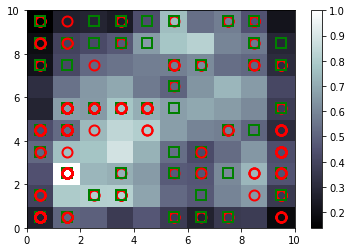

In [50]:
#This will init. the window that will collect the map
bone()
#Return all the dists. for all the winning nodes
pcolor(som.distance_map().T)
colorbar()

#Markers - 
#o - not approved
#s - approved
markers = ['o','s']
colors = ['r','g']

for i,x in enumerate(X):
    #i - index of customers
    #x - vectors of customers at the diff. iterations
    
    #This will give us the winning node of customer x
    w = som.winner(x)
    #On this winning node plot the marker
    #These are the co-ordinates of the winning node
    plot(w[0]+0.5,w[1]+0.5,markers[y[i]],
         markeredgecolor=colors[y[i]],markerfacecolor='None',
        markersize=10,markeredgewidth=2)

show()

In [51]:
#The frauds nodes are far from the general rule.
#The white ones indicate frauds

In [52]:
#Finding the frauds
mappings = som.win_map(X)

In [53]:
mappings

defaultdict(list,
            {(1,
              4): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([2.00689547e-01, 1.00000000e+00, 3.07067669e-01, 1.87500000e-01,
                     5.00000000e-01, 6.15384615e-01, 3.75000000e-01, 2.98245614e-03,
                     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
                     5.00000000e-01, 1.45000000e-01, 6.00000000e-05]), array([0.46368263, 1.        , 0.50496241, 0.23214286, 0.5       ,
                     0.53846154, 0.375     , 0.03508772, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.        , 0.00228   ]), array([0.57477506, 1.        , 0.14030075, 0.08928571, 0.5       ,
                     0.        , 0.        , 0.00298246, 0.        , 0.        ,
                     0. 

In [55]:
frauds = np.concatenate(mappings[(1,2)],axis=0)

In [56]:
frauds

array([6.96090562e-01, 0.00000000e+00, 1.34135338e-01, 2.50000000e-01,
       5.00000000e-01, 5.38461538e-01, 3.75000000e-01, 5.78947368e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.00000000e-01, 8.00000000e-02, 0.00000000e+00, 5.37082197e-01,
       0.00000000e+00, 2.16842105e-01, 2.08928571e-02, 5.00000000e-01,
       3.84615385e-01, 3.75000000e-01, 1.40350877e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.00000000e-01,
       1.30000000e-01, 1.00400000e-02, 3.29777479e-01, 0.00000000e+00,
       1.61654135e-01, 6.25000000e-02, 0.00000000e+00, 5.38461538e-01,
       3.75000000e-01, 5.78947368e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.00000000e-01, 6.60000000e-02,
       0.00000000e+00, 5.61424584e-01, 0.00000000e+00, 3.54586466e-01,
       8.92857143e-02, 5.00000000e-01, 1.53846154e-01, 8.75000000e-01,
       7.36842105e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [63]:
#inverse the scaling
frauds = sc.inverse_transform(frauds.reshape(-1,15))

In [64]:
frauds

array([[1.5739548e+07, 0.0000000e+00, 2.2670000e+01, 7.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 1.0000000e+00],
       [1.5699839e+07, 0.0000000e+00, 2.8170000e+01, 5.8500000e-01,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.6000000e+02, 1.0050000e+03],
       [1.5648069e+07, 0.0000000e+00, 2.4500000e+01, 1.7500000e+00,
        1.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.3200000e+02, 1.0000000e+00],
       [1.5705918e+07, 0.0000000e+00, 3.7330000e+01, 2.5000000e+00,
        2.0000000e+00, 3.0000000e+00, 8.0000000e+00, 2.1000000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

In [65]:
frauds_data = pd.DataFrame(frauds)

In [66]:
frauds_data

0    1      2       3    4    5    6      7    8    9    10   11  \
0   15739548.0  0.0  22.67   7.000  2.0  8.0  4.0  0.165  0.0  0.0  0.0  0.0   
1   15699839.0  0.0  28.17   0.585  2.0  6.0  4.0  0.040  0.0  0.0  0.0  0.0   
2   15648069.0  0.0  24.50   1.750  1.0  8.0  4.0  0.165  0.0  0.0  0.0  0.0   
3   15705918.0  0.0  37.33   2.500  2.0  3.0  8.0  0.210  0.0  0.0  0.0  0.0   
4   15672894.0  0.0  18.58  10.000  2.0  2.0  4.0  0.415  0.0  0.0  0.0  0.0   
5   15783883.0  0.0  38.92   1.665  2.0  6.0  4.0  0.250  0.0  0.0  0.0  0.0   
6   15756538.0  0.0  39.08   4.000  2.0  8.0  4.0  3.000  0.0  0.0  0.0  0.0   
7   15651868.0  0.0  38.75   1.500  2.0  1.0  1.0  0.000  0.0  0.0  0.0  0.0   
8   15728523.0  0.0  38.33   4.415  2.0  8.0  4.0  0.125  0.0  0.0  0.0  0.0   
9   15716082.0  0.0  22.25   1.250  1.0  1.0  1.0  3.250  0.0  0.0  0.0  0.0   
10  15593959.0  0.0  21.75   1.750  1.0  5.0  3.0  0.000  0.0  0.0  0.0  0.0   
11  15629750.0  0.0  24.33   2.500  1.0  3.0  5.0  4.500  0.0  0.0  0.0  0.0   
12  15675926.0  0.0  19.17   5.415  2.0  3.0  8.0  0.290  0.0  0.0  0.0  0.0   
13  15672637.0  0.0  36.75   4.710  2.0  1.0  1.0  0.000  0.0  0.0  0.0  0.0   
14  15592999.0  0.0  31.75   3.000  1.0  5.0  3.0  0.000  0.0  0.0  0.0  0.0   
15  15757434.0  0.0  25.58   0.000  2.0  8.0  4.0  0.000  0.0  0.0  0.0  0.0   
16  15769548.0  0.0  32.00   6.000  2.0  2.0  4.0  1.250  0.0  0.0  0.0  0.0   
17  15742009.0  0.0  33.25   3.000  1.0  6.0  4.0  2.000  0.0  0.0  0.0  0.0   
18  15752344.0  0.0  21.08   5.000  1.0  1.0  1.0  0.000  0.0  0.0  0.0  0.0   
19  15736533.0  0.0  31.57  11.250  2.0  1.0  1.0  0.000  0.0  0.0  0.0  0.0   
20  15593834.0  0.0  16.33   0.210  2.0  6.0  4.0  0.125  0.0  0.0  0.0  0.0   
21  15673907.0  0.0  71.58   0.000  2.0  8.0  4.0  0.000  0.0  0.0  0.0  0.0   
22  15737909.0  0.0  20.83   8.500  2.0  8.0  4.0  0.165  0.0  0.0  0.0  0.0   
23  15660528.0  0.0  21.92  11.665  2.0  4.0  8.0  0.085  0.0  0.0  0.0  0.0   
24  15779207.0  0.0  27.33   1.665  2.0  1.0  1.0  0.000  0.0  0.0  0.0  0.0   
25  15611409.0  0.0  23.58   0.585  1.0  1.0  1.0  0.125  0.0  0.0  0.0  0.0   
26  15609987.0  0.0  22.67   0.790  2.0  3.0  4.0  0.085  0.0  0.0  0.0  0.0   
27  15752578.0  0.0  41.58   1.040  2.0  6.0  4.0  0.665  0.0  0.0  0.0  0.0   
28  15666096.0  0.0  52.50   7.000  2.0  6.0  8.0  3.000  0.0  0.0  0.0  0.0   
29  15609758.0  0.0  20.75   9.540  2.0  3.0  4.0  0.040  0.0  0.0  0.0  0.0   
30  15636454.0  0.0  52.17   0.000  1.0  1.0  1.0  0.000  0.0  0.0  0.0  0.0   
31  15611682.0  0.0  20.08   1.250  2.0  8.0  4.0  0.000  0.0  0.0  0.0  0.0   
32  15608916.0  0.0  17.67   0.000  1.0  5.0  1.0  0.000  0.0  0.0  0.0  0.0   
33  15615296.0  0.0  17.92  10.210  2.0  1.0  1.0  0.000  0.0  0.0  0.0  0.0   
34  15618258.0  0.0  22.75   6.165  2.0  6.0  4.0  0.165  0.0  0.0  0.0  0.0   
35  15805261.0  0.0  48.17   1.335  2.0  3.0  7.0  0.335  0.0  0.0  0.0  0.0   

     12     13      14  
0   2.0  160.0     1.0  
1   2.0  260.0  1005.0  
2   2.0  132.0     1.0  
3   2.0  260.0   247.0  
4   2.0   80.0    43.0  
5   2.0    0.0   391.0  
6   2.0  480.0     1.0  
7   2.0   76.0     1.0  
8   2.0  160.0     1.0  
9   2.0  280.0     1.0  
10  2.0  160.0     1.0  
11  2.0  200.0   457.0  
12  2.0   80.0   485.0  
13  2.0  160.0     1.0  
14  2.0  160.0    21.0  
15  3.0  184.0     1.0  
16  2.0  272.0     1.0  
17  2.0  180.0     1.0  
18  2.0    0.0     1.0  
19  2.0  184.0  5201.0  
20  2.0  200.0     2.0  
21  3.0  184.0     1.0  
22  2.0    0.0   352.0  
23  2.0  320.0     6.0  
24  2.0  340.0     2.0  
25  2.0  120.0    88.0  
26  2.0  144.0     1.0  
27  2.0  240.0   238.0  
28  2.0    0.0     1.0  
29  2.0  200.0  1001.0  
30  2.0    0.0     1.0  
31  2.0    0.0     1.0  
32  2.0   86.0     1.0  
33  2.0    0.0    51.0  
34  2.0  220.0  1001.0  
35  2.0    0.0   121.0